In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from data_preprocesser import preprocessed_data_path

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Processing Functions
def identify_tokens(row):
    review = row['text']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    # token_words = [re.sub("[^\w\s]", " ", w) for w in tokens]
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

stops = set(stopwords.words("english"))                  

def remove_stops(row):
    my_list = row['words']
    meaningful_words = [w for w in my_list if not w in stops and w != " "]
    return (meaningful_words)

stemming = PorterStemmer()

def stem_list(row):
    my_list = row['words_meaningful']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

lemming = WordNetLemmatizer()

def lem_list(row):
    my_list = row['words_non_stop']
    lemmed_list = [lemming.lemmatize(word) for word in my_list]
    return (lemmed_list)

def rejoin_words(row):
    my_list = row['words_meaningful']
    joined_words = ( " ".join(my_list))
    return joined_words

In [3]:
def process(data_df):
    data_df['text'] = data_df['text'].str.lower()
    data_df['words'] = data_df.apply(identify_tokens, axis=1)
    data_df['words_non_stop'] = data_df.apply(remove_stops, axis=1)
    data_df['words_meaningful'] = data_df.apply(lem_list, axis=1)
    data_df['processed'] = data_df.apply(rejoin_words, axis=1)
    return data_df

In [20]:
df_auto = pd.read_csv(preprocessed_data_path + 'categories_30000/yelp_academic_dataset_review_Auto Repair.csv')
df_processed_auto = process(df_auto)

In [21]:
df_hair = pd.read_csv(preprocessed_data_path + 'categories_30000/yelp_academic_dataset_review_Hair Salons.csv')
df_processed_hair = process(df_hair)

In [22]:
df_health = pd.read_csv(preprocessed_data_path + 'categories_30000/yelp_academic_dataset_review_Health & Medical.csv')
df_processed_health = process(df_health)

In [23]:
df_restaurant = pd.read_csv(preprocessed_data_path + 'categories_30000/yelp_academic_dataset_review_Restaurants.csv')
df_processed_restaurant = process(df_restaurant)

In [25]:
dataframes = {
    "Auto Repair" : df_processed_auto,
    "Hair Salons" : df_processed_hair,
    "Health & Medical" : df_processed_health,
    "Restaurants" : df_processed_restaurant
}

Auto Repair : There are 11509080 words in the combination of all review


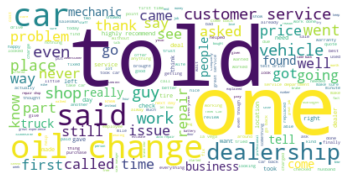

Hair Salons : There are 10112135 words in the combination of all review


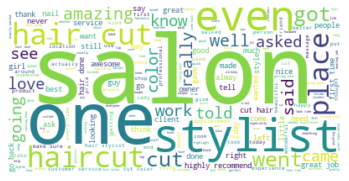

Health & Medical : There are 11178812 words in the combination of all review


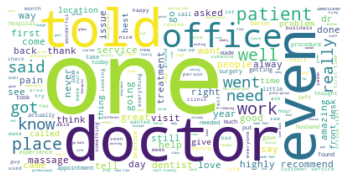

Restaurants : There are 11304743 words in the combination of all review


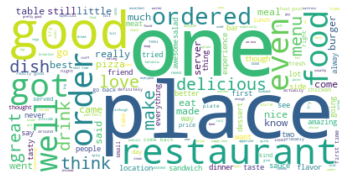

In [27]:
for key, df in dataframes.items():
    text = " ".join(review for review in df['processed'])
    print ("{} : There are {} words in the combination of all review".format(key, len(text)))
    
    # Generate a word cloud image
    wordcloud = WordCloud(background_color="white").generate(" ".join(review for review in df['processed']))

    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()